<a href="https://colab.research.google.com/github/tirals88/Numerical-Mathematics-and-Computing/blob/main/Chap6_Spline%20Functions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

# 6.1 1차 및 2차 스플라인

## 1차 스플라인

스플라인 함수는 어떤 매끄러운 조건을 가진 다항식의 조각들로 이루어진 함수이다. 예로 다변형 polygonal함수 또는 1차 스플라인으로 불리는 이 함수는 각 조각들이 연속성을 가지고 서로 연결되는 선형 다항식이다.

스플라인 이론에서는 함수의 성질이 바뀌는 점인 $t_{0}, t_{1}, t_{2}, \cdots , t_{n}$을 절점 knot이라 지칭한다.

$\boxtimes$ **정리 1** 1차 스플라인

다음을 만족하는 함수 $S$를 1차 스플라인이라 부른다.

1. $S$의 정의역은 구간 $[a, b]$이다.
2. $S$는 $[a, b]$에서 연속이다.
3. 각 부분구간 $[t_{i}, t_{i+1}]$에서 $S$가 선형 다항식임을 만족하는 구간의 분할 $a = t_{0} < t_{1} < \cdots < t_{n} = b$가 존재한다.

일반적으로 구간 $[a, b]$외부에서 $S(x)$는 $a$의 왼쪽 영역에서는 가장 왼쪽의 부분구간 $[t_{0}, t_{1}]$의 함수로 정의하고, $b$의 오른쪽 영역에서는 가장 오른쪽의 부분구간 $[t_{n-1}, t_{n}]$의 함수로 정의한다.

스플라인 부분 : 선형 $S_{i}(x)$

구간 $[t_{i}, t_{i+1}]$에서 다음을 얻는다.
$$S_{i}(x) = y_{i} + m_{i}(x-t_{i}) = y_{i} + \frac{y_{i+1} - y_{i}}{t_{i+1} - t_{i}}(x - t_{i})$$

함수 $S$는 계수 $n$개와 상수 $n$개 총 $2n$개의 변수와, $2n$개의 조건으로 변수의 수와 조건의 수가 같다. 조건이라 함은 각 구성 함수 $S_{i}$가 부분구간의 양 끝점에서의 데이터를 보간한다는 것이다.

또한 $t_{0} \leq x \leq t_{n}$이면, $x$를 포함하는 구간 $[t_{i}, t_{i+1}]$는 $x - t_{i}$가 $x-t_{n-1}, x-t_{n-2}, \cdots, x-t_{0}$ 중 처음으로 음이 아닌 값이라는 사실로 특정지어진다.

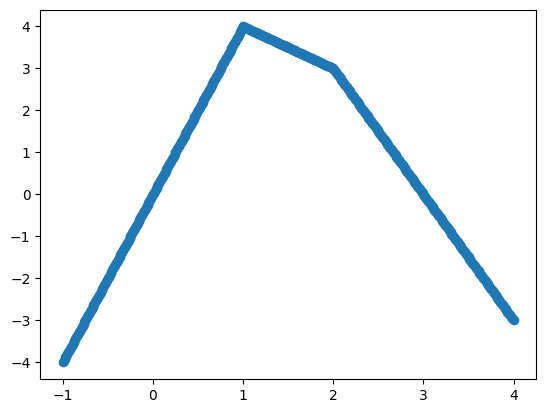

In [2]:
#스플라인 1차 함수
def Spline1(n, t_, y_, x):
  k = 0
  for i in range(n):
    if not (x - t_[n-1 - i]) < 0:
      k = n-1 - i
      break

  spline_result = y_[k] + (x-t_[k])*(y_[k+1] - y_[k])/(t_[k+1] - t_[k])
  return spline_result

t_00 = [0, 1, 2, 3]
y_00 = [0, 4, 3, 0]
#Spline1(3, t_00, y_00, 2.5)

x_00 = np.arange(-1, 4.01, 0.01)
y_01 = np.array([Spline1(3, t_00, y_00, x__) for x__ in x_00])
plt.scatter(x_00, y_01)
plt.show()

## 연속계수

1차 스플라인을 통해 함수를 보간할 때 그 적합성을 평가하기 위해 함수 $f$의 연속계수 modulus of continuity라는 것을 정의할 필요가 있다.

$f$의 연속계수는 다음과 같다.

$$w(f;\;h) = sup\{|f(u) - f(v)| : a \leq u \leq v \leq b, |u-v| \leq h\}$$

만약 $f$가 구간 내에서 연속이면 $f$는 균등 연속 uniformly continuous이고, $h$가 $0$에 가까이 감에 따라 $w(f;\;h)$도 $0$에 가까이 간다. 반대의 경우는 그렇지 않다.

만약 $f$가 구간 $(a, b)$에서 미분가능하고 $f'(x)$가 $(a, b)$에서 유계이면 연속계수의 추정값을 얻는 데 평균값 정리를 사용할 수 있다.

$$|f(u) - f(v)| = |f'(c)(u-v)| \leq M_{1} |u-v| \leq M_{1}h$$

그리고 또한 $f$를 보간하는 1차 다항식 $p$가 있고, $h = b-a$일 때, 다음을 얻을수 있다.

$$|f(x) - p(x)| \leq w(f; \;h)$$

**증명**

선형 함수 $p$는 다음과 같은 식으로 주어진다.

$$p(x) = (\frac{x-a}{b-a})f(b) + (\frac{b-x}{b-a})f(a) $$
$$f(x) - p(x) = (\frac{x-a}{b-a})[f(x) - f(b)] + (\frac{b-x}{b-a})[f(x) - f(a)]$$

->

\begin{eqnarray}
    |f(x) - p(x)| & \leq &(\frac{x-a}{b-a})|f(x) - f(b)| + (\frac{b-x}{b-a})|f(x) - f(a)| \\
		& \leq &(\frac{x-a}{b-a})w(f;\;h) + (\frac{b-x}{b-a})w(f;\;h) \\
		& = & [(\frac{x-a}{b-a}) + (\frac{b-x}{b-a})]w(f;\;h) = w(f;\;h)
\end{eqnarray}

##2차 스플라인

$\boxtimes$ **정리 1** 2차 스플라인

다음을 만족하는 함수 $Q$를 2차 스플라인이라 부른다.

1. $Q$의 정의역은 구간 $[a, b]$이다.
2. $Q$ 와 $Q'$ $[a, b]$에서 연속이다.
3. 구간의 분할 $a = t_{0} < t_{1} < \cdots < t_{n} = b$가 존재하고, $Q$는 각 부분구간 $[t_{i}, t_{i+1}]$에서 최대 2차의 다항식이다.

이 때, $Q'(x)$는 연속이므로 $z_{i} \equiv Q'(t_{i})$로 두면, $Q_{i}$의 식은 다음과 같다.

$$Q_{i}(x) = \frac{z_{i+1} - z_{i}}{2(t_{i+1} - t_{i})}(x-t_{i})^{2} + z_{i}(x - t_{i}) + y_{i}$$

그리고 위 식이 연속임을 이용해 수정하면 다음 식을 얻을 수 있다.

$$z_{i+1} = -z_{i} + 2(\frac{y_{i+1} - y_{i}}{t_{i+1}-t_{i}})$$

이 식은 임의의 값 $z_{0}$으로부터 시작해서 재귀적으로 벡터 $[z_{0}, z_{1}, \cdots , z_{n}]^{T}$를 얻는 데 사용될 수 있다.

In [3]:
#ex3
def Spline2(n, t_, y_, x, z_0):
  recurs_z = [z_0]
  for i in range(n):
    recurs_z.append(2*(y_[i+1] - y_[i])/(t_[i+1] - t_[i])-recurs_z[-1] )

  k = 0
  for i in range(n):
    if not (x - t_[n-1 - i]) < 0:
      k = n-1 - i
      break

  spline_result = y_[k] + (x-t_[k])*(recurs_z[k]) + (x-t_[k])**2 * (recurs_z[k+1] - recurs_z[k])/(2*(t_[k+1] - t_[k]))
  return spline_result

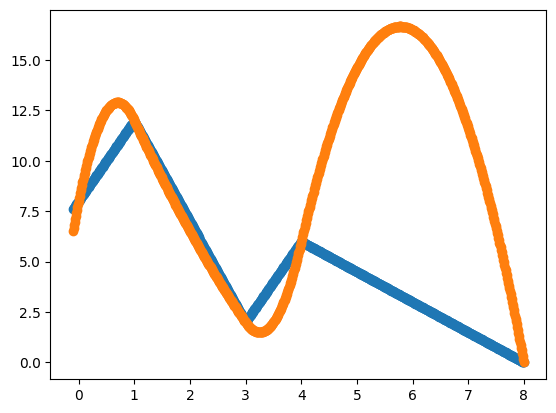

In [4]:
t_03 = [0, 1, 3, 4, 8]
y_03 = [8, 12, 2, 6, 0]

x_03 = np.arange(-0.1, 8.01, 0.01)
q_031 = np.array([Spline1(4, t_03, y_03, x__) for x__ in x_03])
q_032 = np.array([Spline2(4, t_03, y_03, x__, 14) for x__ in x_03])

plt.scatter(x_03, q_031)
plt.scatter(x_03, q_032)
plt.show()

In [5]:
# @title
#1
def Spline1_up(n, t_, y_, x):
  k = 0
  for i in range(n):
    if not (x - t_[i]) > 0:
      k = i+1
      break

  spline_result = y_[k] + (x-t_[k])*(y_[k+1] - y_[k])/(t_[k+1] - t_[k])
  return spline_result

In [16]:
# @title
#3
#구간별 2차 선형 다항식
def Bi_Linear(n, m, x_, y_, z_, input):
  i = 0
  for k in range(n):
    if not (input[0] - x_[k]) > 0:
      i = k - 1
      break

  j = 0
  for k in range(m):
    if not (input[1] - y_[k]) > 0:
      j = k - 1
      break

  p_1 = ((x_[i] - input[0])*(y_[j]-input[1])*z_[i+1,j+1] + (x_[i+1] - input[0])*(y_[j+1]-input[1])*z_[i,j]) / ((x_[i+1]-x_[i])*(y_[j+1] - y_[j]))
  p_2 = ((x_[i+1] - input[0])*(y_[j]-input[1])*z_[i,j+1] + (x_[i] - input[0])*(y_[j+1]-input[1])*z_[i+1,j]) / ((x_[i+1]-x_[i])*(y_[j+1] - y_[j]))
  p = p_1 - p_2

  return p

In [48]:
#5*10 개의 불균일 간격의 데이터
x_13 = [-1, 0, 0.5, 2, 3]
y_13 = [-1, -0.2, 0, 0.4, 0.8, 1.2, 1.5, 1, 1.8, 3]

X_13, Y_13 = np.meshgrid(x_13, y_13)
z_13 = np.exp(X_13 + Y_13)
z_13 = np.transpose(z_13)

In [47]:
Bi_Linear(4, 9, x_13, y_13, z_13, (x_03[0], y_03[0]))

-0.1171565700066412

In [51]:
x_03 = np.linspace(-1.5, 2.5, 9)
y_03 = np.linspace(-1.5, 2.5, 9)
X_03, Y_03 = np.meshgrid(x_03, y_03)

p_13 = np.array([ [Bi_Linear(3, 2, x_13, y_13, z_13, (x__, y__)) for y__ in y_03] for x__ in x_03 ])

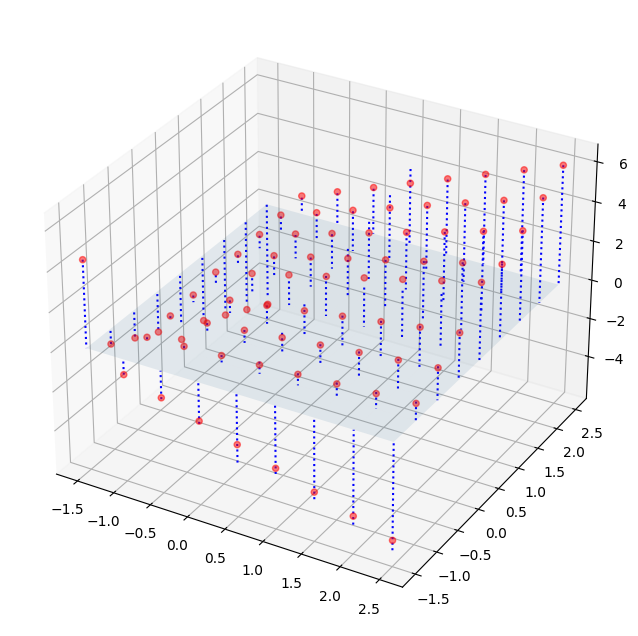

In [83]:
fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')

ax.scatter(X_03, Y_03, p_13, color = 'r', alpha = 0.5)

for i in range(len(X_03.reshape(-1,))):
    ax.plot([X_03.reshape(-1,)[i], X_03.reshape(-1,)[i]], [Y_03.reshape(-1,)[i], Y_03.reshape(-1,)[i]], [np.transpose(p_13).reshape(-1,)[i], 0], color='blue', linestyle=':')
#ax.stem(X_03.reshape(-1,), Y_03.reshape(-1,), np.transpose(p_13).reshape(-1,))

ax.plot_surface(X_03, Y_03, np.zeros_like(X_03), alpha=0.1)

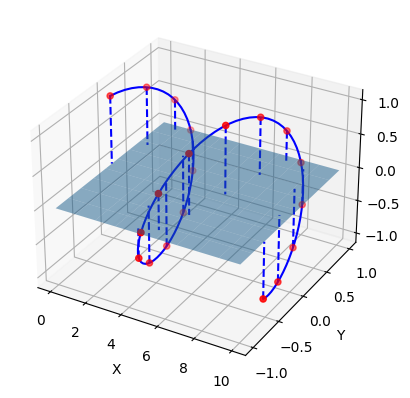

In [84]:
#Chat GPT 참고 코드
#Line26, 27의 scatter point-XYplane 간 plot 코드 질문

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.interpolate import splprep, splev

# Generate some random data points
x = np.linspace(0, 10, 20)
y = np.sin(x)
z = np.cos(x)

# Interpolate a spline through the data points
tck, u = splprep([x, y, z], s=0)
new_points = splev(np.linspace(0, 1, 100), tck)

# Plot the original data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot scatter points
ax.scatter(x, y, z, c='r', marker='o')

# Plot lines between scatter points and x-y plane
for i in range(len(x)):
    ax.plot([x[i], x[i]], [y[i], y[i]], [z[i], 0], color='blue', linestyle='--')

# Plot the spline curve
ax.plot(new_points[0], new_points[1], new_points[2], c='b')

# Plot the x-y plane
xx, yy = np.meshgrid(np.linspace(min(x), max(x), 10), np.linspace(min(y), max(y), 10))
zz = np.zeros_like(xx)
ax.plot_surface(xx, yy, zz, alpha=0.5)

# Set labels and show plot
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

In [86]:
#5
#Spline2 함수가 z_0 초기값이 주어질 때, z_ 배열과 Q(x) 값을 계산

# 6.2 자연 3차 스플라인

$\boxtimes$ **정의** $k$차 스플라인

다음을 만족하는 함수 $S$를 $k$차 스플라인이라 부른다.

1. $S$의 정의역은 구간 $[a, b]$이다.
2. $S$ 와 $S', S'', \cdots , S^{(k-1)}$은 모두  $[a, b]$에서 연속이다.
3. 구간의 분할 $a = t_{0} < t_{1} < \cdots < t_{n} = b$가 존재하고, $S$는 각 부분구간 $[t_{i}, t_{i+1}]$에서 최대 $k$차 다항식이다.

## 자연 3차 스플라인

앞선 2차 스플라인과 마찬가지로 진행되며, $S$는 $n$개의 3차 다항식 조각들로 이루어져 있다.

보간 조건들은 다음과 같다.

$$S(t_{i}) = y_{i}$$

연속 조건들은 오직 내부 절점들에만 부여된다. 각 부분구간내에서는 최대 3차 다항식으로 이루어져 있기 때문에 부분구간 내의 점에 대해서는 항상 연속이기 때문이다.

$$lim_{x \rightarrow t_{i}^{-}}{S^{k}(t_{i})} = lim_{x \rightarrow t_{i}^{+}}{S^{k}(t_{i})}$$

사용 가능한 차수의 모든 자유도를 사용하기 위해서 두 개의 조건이 더 필요하다.

$$ S''(t_{0}) = S''(t_{n}) = 0$$

위의 과정을 통해 얻은 스플라인 함수를 자연 3차 스플라인이라고 부른다.

- 스플라인 계수에 대한 연립방정식을 완전하게 하는 다른 방법들로 **주기적 3차 스플라인 periodic cubic spline**과 **고정적 3차 스플라인 clamped cubic spline**이 있다.

- 고정적 스플라인은 양 끝점에서 기울기가 고정된 스플라인 곡선이다.

- 주기적 스플라인은 양 끝점의 함숫값, 기울기, $k$차 미분 값이 서로 일치하는 곡선이다.

## 자연 3차 스플라인 알고리즘

앞선 가정으로 두 가지를 알고 있다.

$$ z_{i} \equiv S''(t_{i}) \:\:\:(0 \leq i \leq n) $$
$$ z_{0} = z_{n} = 0 $$

$S''$은 양 끝점에서 연속이고 최대 1차 다항식을 가지므로, 다음과 같이 정의할 수 있다. 이 때 $h_{i}$는 구간의 길이로 $t_{i+1} - t_{i}$이다.

$$S''_{i}(x) = \frac{z_{i+1}}{h_{i}}(x-t_{i}) + \frac{z_{i}}{h_{i}}(t_{i+1} - x)$$

이를 두 번 적분하면 $S_{i}$ 자체를 얻을 수 있다.

\begin{eqnarray}
S_{i}(x) &= &\frac{z_{i+1}}{6h_{i}}(x-t_{i})^{3} + \frac{z_{i}}{6h_{i}}(t_{i+1} - x)^{3} + cx + d \\
& = &\frac{z_{i+1}}{6h_{i}}(x-t_{i})^{3} + \frac{z_{i}}{6h_{i}}(t_{i+1} - x)^{3} + C_{i}(x - t_{i}) + D_{i}(t_{i+1} - x)
\end{eqnarray}

$C_{i}$ 와 $D_{i}$를 계산하기 위해 절점 $t_{i}, t_{i+1}$을 대입해보면, 다음을 얻을 수 있다.

$$y_{i} = S_{i}(t_{i}) = 0 + \frac{z_{i}}{6h_{i}}(t_{i+1} - t_{i})^{3} + 0 + D_{i}(t_{i+1} - t_{i}) $$
$$y_{i+1} = S_{i}(t_{i+1}) = \frac{z_{i+1}}{6h_{i}}(t_{i+1}-t_{i})^{3} + 0 + C_{i}(t_{i+1} - t_{i}) + 0$$

$h_{i}$를 이용해 식을 다음과 같이 수정할 수 있다.

$$S_{i}(x) = \frac{z_{i+1}}{6h_{i}}(x-t_{i})^{3} + \frac{z_{i}}{6h_{i}}(t_{i+1} - x)^{3} + (\frac{y_{i+1}}{h_{i}} - \frac{h_{i}}{6}z_{i+1})(x - t_{i}) + (\frac{y_{i}}{h_{i}} - \frac{h_{i}}{6}z_{i})(t_{i+1} - x)$$